In [3]:
import pandas as pd
import altair as alt
alt.renderers.enable('mimetype')
%matplotlib inline

# produce vector inline graphics
from IPython.display import set_matplotlib_formats, display, Markdown, HTML

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('png')

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 4]
display(HTML("<style>.container { width:70% !important; }</style>"))

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/shubham13p/Ad-Click-Prediction/master/advertising.csv')
df['Click_labeled'] = df['Clicked on Ad'].apply(lambda x: "Click" if x == 1 else "No Click")
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Click_labeled
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,No Click
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,No Click
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,No Click
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,No Click
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,No Click


## Age, time on site, click rate


Here, we're going to use a linked, interactive pair of charts to investigate how these three variables interact.



### What do we mean by "linked?"


* We can make a selection in each chart (try clicking and dragging).
* Notice how the selection in one chart modifies the data shown in the other.
* This is because both charts share a view on our underlying data.


### Why is this helpful?


We want to communicate a multi-dimensional relationship here: there are distinct usage patterns by age, and we see that age and "time on site" both influence click rate. How is age tied to "time on site", though? An interactive chart makes it easy for the users to find this out themselves.


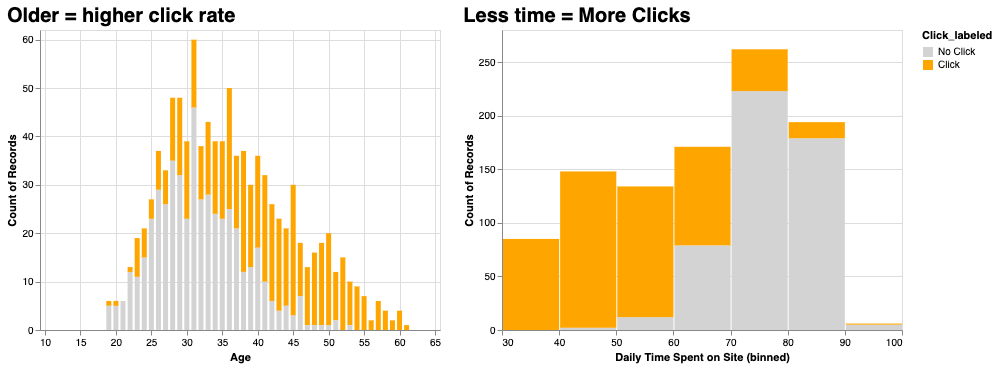

In [5]:
brush = alt.selection_interval(encodings=['x'], empty='all')
brush2 = alt.selection_interval(encodings=['x'], empty='all')

domain = ['No Click', 'Click']
range_ = ['lightgray', 'orange']

bars1 = alt.Chart(df).mark_bar().encode(
    x=alt.X('Daily Time Spent on Site:Q', bin=True),
    color='Click_labeled:N',
    y='count(Click_labeled):N'
).add_selection(
    brush
).transform_filter(
    brush2
).properties(
    title='Less time = More Clicks'
)

bars = alt.Chart(df).mark_bar().encode(
    x=alt.X('Age:Q', scale=alt.Scale(domain=(10, 65))),
    color=alt.Color('Click_labeled:N', scale=alt.Scale(domain=domain, range=range_)),
    y=alt.Y('count(Click_labeled):N', scale=alt.Scale(domain=(0, 62))),
).transform_filter(
    brush
).add_selection(
    brush2
).properties(
    title='Older = higher click rate'
)

(bars | bars1).configure_title(
    fontSize=20,
    anchor='start')

### Another view on Age vs time on site


* Here, we make a stacked histogram of age and time on site. This communicates only some of the information in the charts above. Notably, we no longer tie this information to the click rate, which is the quantity we actually care about.
* What do we conclude from this chart? What do these results actually mean with regards to the click rate?
* We can somewhat observe that the younger groups increase at/around 70 minutes, but not as clearly as in the charts above.

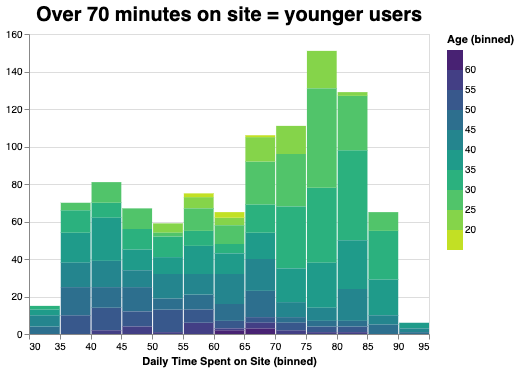

In [6]:
bars = (alt.Chart(df).mark_bar()
 .encode(
     x=alt.X('Daily Time Spent on Site', bin=alt.Bin(maxbins=14)),
     y=alt.Y('count(Daily Time Spent on Site)', title=''),
     color=alt.Color('Age', 
                     scale=alt.Scale(scheme='viridis', reverse=True),
                     bin=alt.Bin(maxbins=10)))
 
 .properties(title='Over 70 minutes on site = younger users')
)


bars.configure_title(fontSize=20)

### Month and age


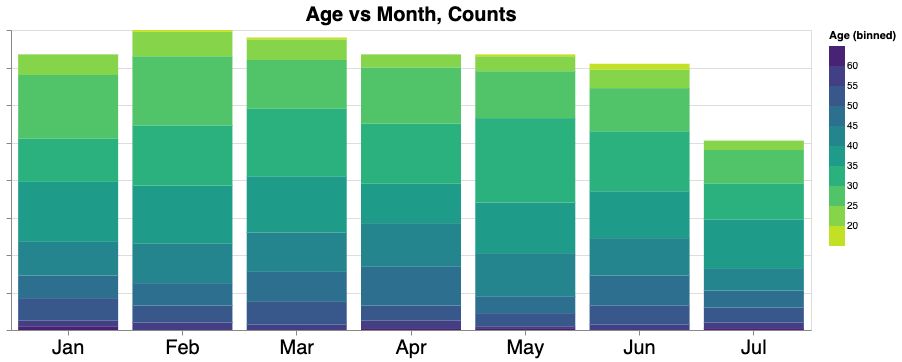

In [7]:
(alt.Chart(df, width=800, title='Age vs Month, Counts').mark_bar(width=100)
 .encode(
     alt.X('month(Timestamp):O', title=''),
     y=alt.Y('count(Clicked on Ad):Q', title='', axis=alt.Axis(labels=False)),
     color=alt.Color('Age', 
                         scale=alt.Scale(scheme='viridis', reverse=True),
                         bin=alt.Bin(maxbins=10))
 ).configure_axis(labelAngle=0, labelFontSize=20)).configure_title(fontSize=20)
